<b>Important:</b> Save charts to <code>../charts/lab2_profiling/</code> in highly descriptive format to avoid overrides.

In [1]:
import sys
sys.path.insert(1, '../../../utils')
from numpy import log, ndarray
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, savefig, show, subplots
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from dslabs_functions import plot_multiline_chart, plot_bar_chart, get_variable_types, plot_multibar_chart, define_grid, derive_date_variables, HEIGHT, plot_multi_scatters_chart
from scipy.stats import norm, expon, lognorm
from seaborn import heatmap

# Dimensionality

In [2]:
filename = "../data/raw/traffic_accidents.csv"
file_tag = "traffic_accidents"
data: DataFrame = read_csv(filename, na_values="")

data.shape

(209306, 24)

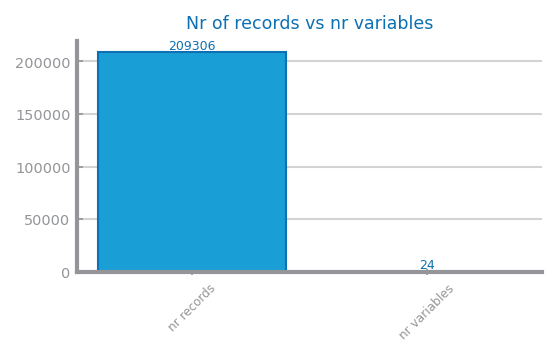

In [3]:
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"../charts/lab2_profiling/{file_tag}_records_variables.png")
show()

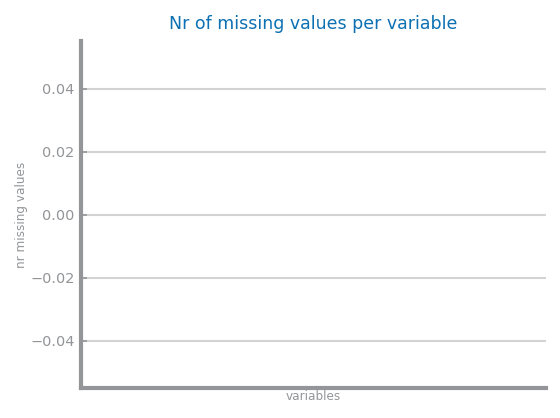

In [4]:
mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"../charts/lab2_profiling/{file_tag}_mv.png")
show()

In [5]:
data.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

{'numeric': ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month'], 'binary': ['crash_type', 'intersection_related_i'], 'date': ['crash_date'], 'symbolic': ['traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'damage', 'prim_contributory_cause', 'most_severe_injury']}


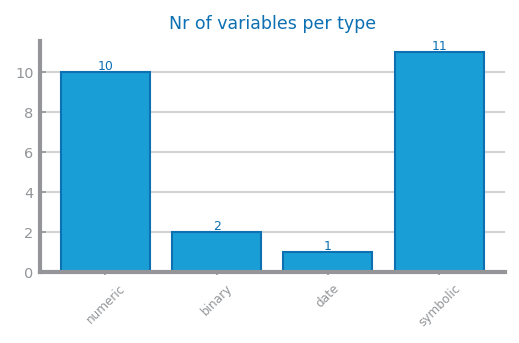

In [6]:
variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"../charts/lab2_profiling/{file_tag}_variable_types.png")
show()

In [7]:
symbolic: list[str] = variable_types["symbolic"]
data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
data.dtypes

crash_date                       datetime64[ns]
traffic_control_device                 category
weather_condition                      category
lighting_condition                     category
first_crash_type                       category
trafficway_type                        category
alignment                              category
roadway_surface_cond                   category
road_defect                            category
crash_type                               object
intersection_related_i                   object
damage                                 category
prim_contributory_cause                category
num_units                                 int64
most_severe_injury                     category
injuries_total                          float64
injuries_fatal                          float64
injuries_incapacitating                 float64
injuries_non_incapacitating             float64
injuries_reported_not_evident           float64
injuries_no_indication                  

# Distribution

In [8]:
file_tag = "traffic_accidents"
data: DataFrame = read_csv("../data/raw/traffic_accidents.csv", na_values="")
summary5: DataFrame = data.describe(include="all")
summary5

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,...,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
unique,189087,19,12,6,18,20,6,7,7,2,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,123944,164700,134109,64157,77753,204590,155905,171730,117376,...,154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000


### Numerical values

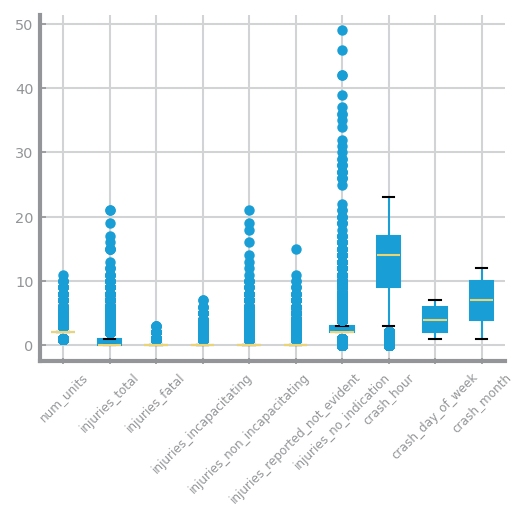

In [9]:
variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    data[numeric].boxplot(rot=45)
    savefig(f"../charts/lab2_profiling/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

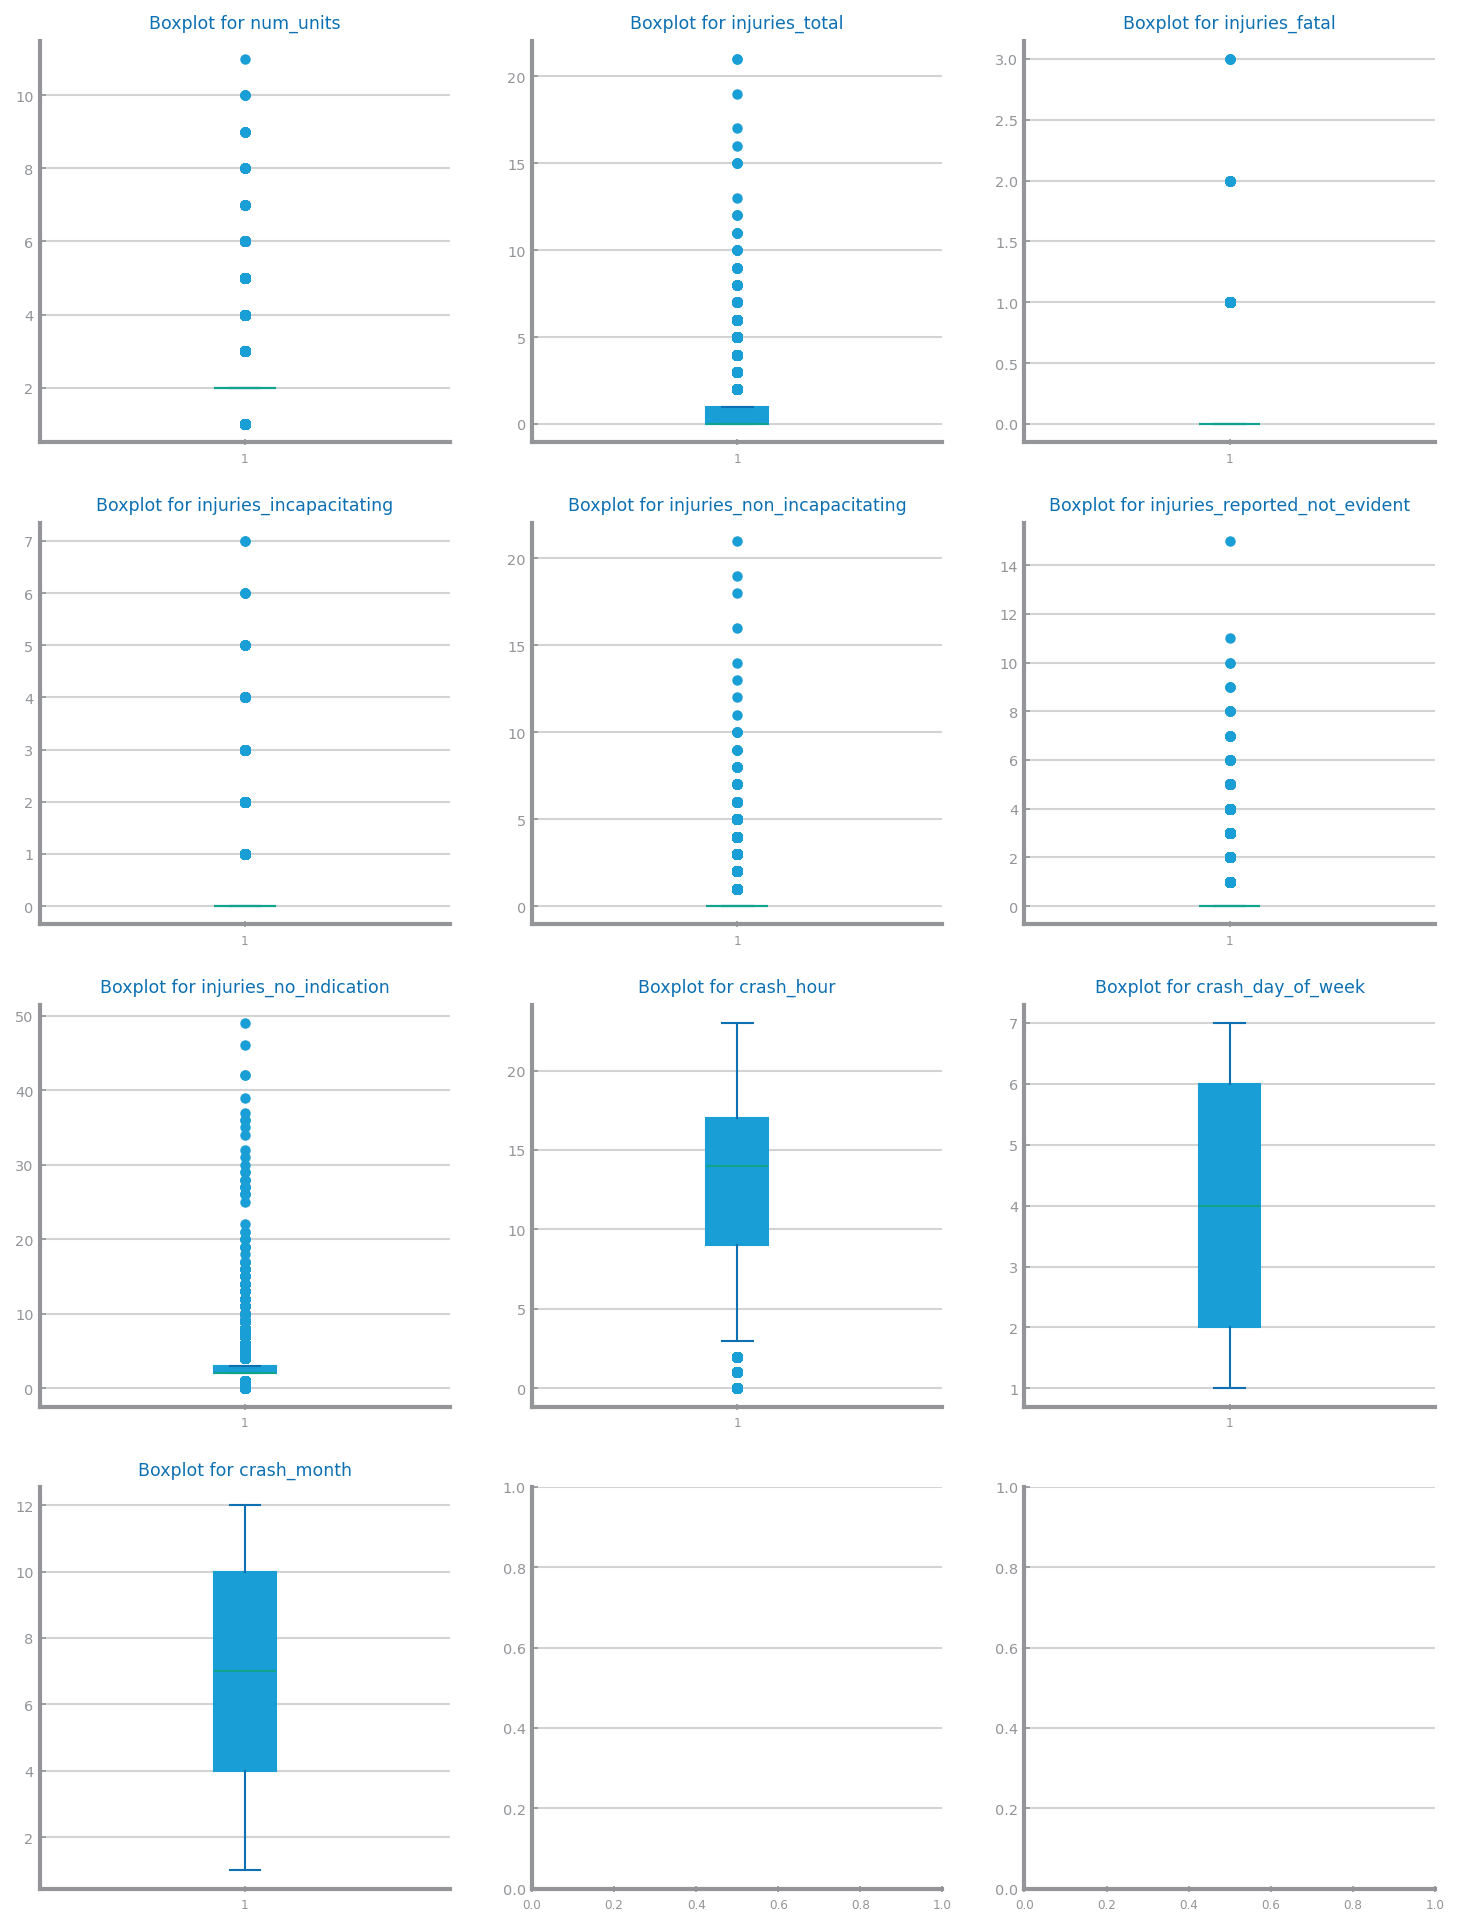

In [10]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"../charts/lab2_profiling/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

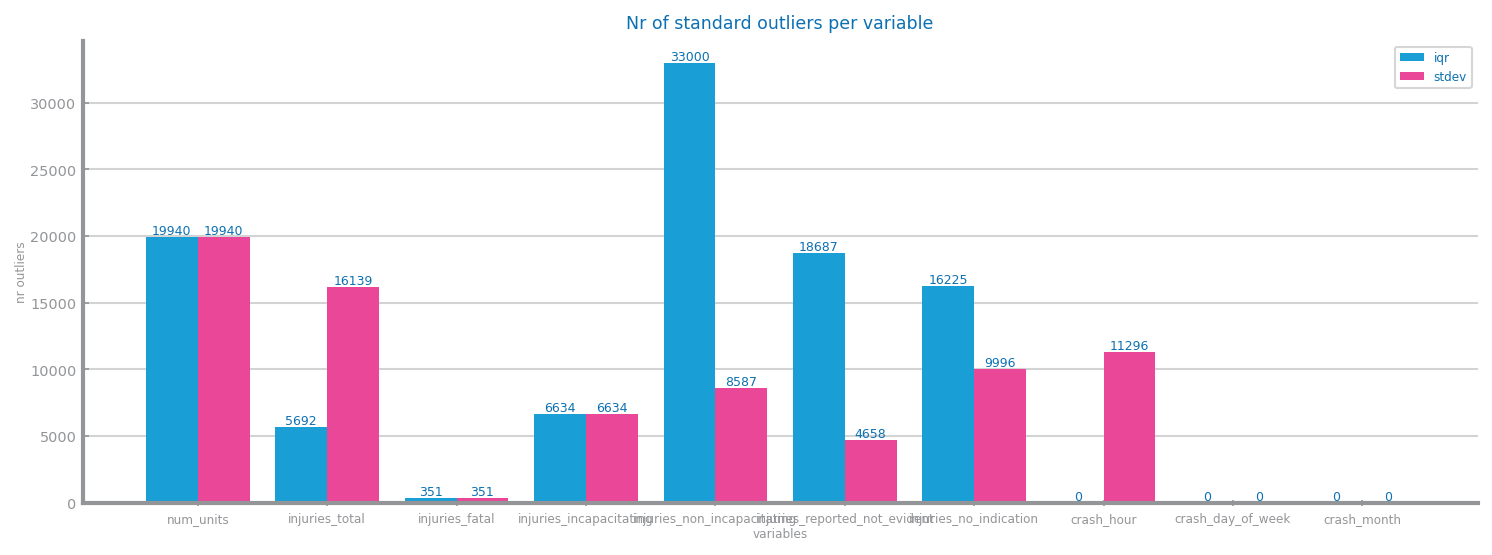

In [11]:
NR_STDEV: int = 2
IQR_FACTOR: float = 1.5


def determine_outlier_thresholds_for_var(
    summary5: Series, std_based: bool = True, threshold: float = NR_STDEV
) -> tuple[float, float]:
    top: float = 0
    bottom: float = 0
    if std_based:
        std: float = threshold * summary5["std"]
        top = summary5["mean"] + std
        bottom = summary5["mean"] - std
    else:
        iqr: float = threshold * (summary5["75%"] - summary5["25%"])
        top = summary5["75%"] + iqr
        bottom = summary5["25%"] - iqr

    return top, bottom


def count_outliers(
    data: DataFrame,
    numeric: list[str],
    nrstdev: int = NR_STDEV,
    iqrfactor: float = IQR_FACTOR,
) -> dict:
    outliers_iqr: list = []
    outliers_stdev: list = []
    summary5: DataFrame = data[numeric].describe()

    for var in numeric:
        top: float
        bottom: float
        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=True, threshold=nrstdev
        )
        outliers_stdev += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

        top, bottom = determine_outlier_thresholds_for_var(
            summary5[var], std_based=False, threshold=iqrfactor
        )
        outliers_iqr += [
            data[data[var] > top].count()[var] + data[data[var] < bottom].count()[var]
        ]

    return {"iqr": outliers_iqr, "stdev": outliers_stdev}


if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of standard outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"../charts/lab2_profiling/{file_tag}_outliers_standard.png")
    show()
else:
    print("There are no numeric variables.")

TODO: Tune <code>nrstdev, iqrfactor</code>. Tuned to 13 and 14.5, respectively, for now.

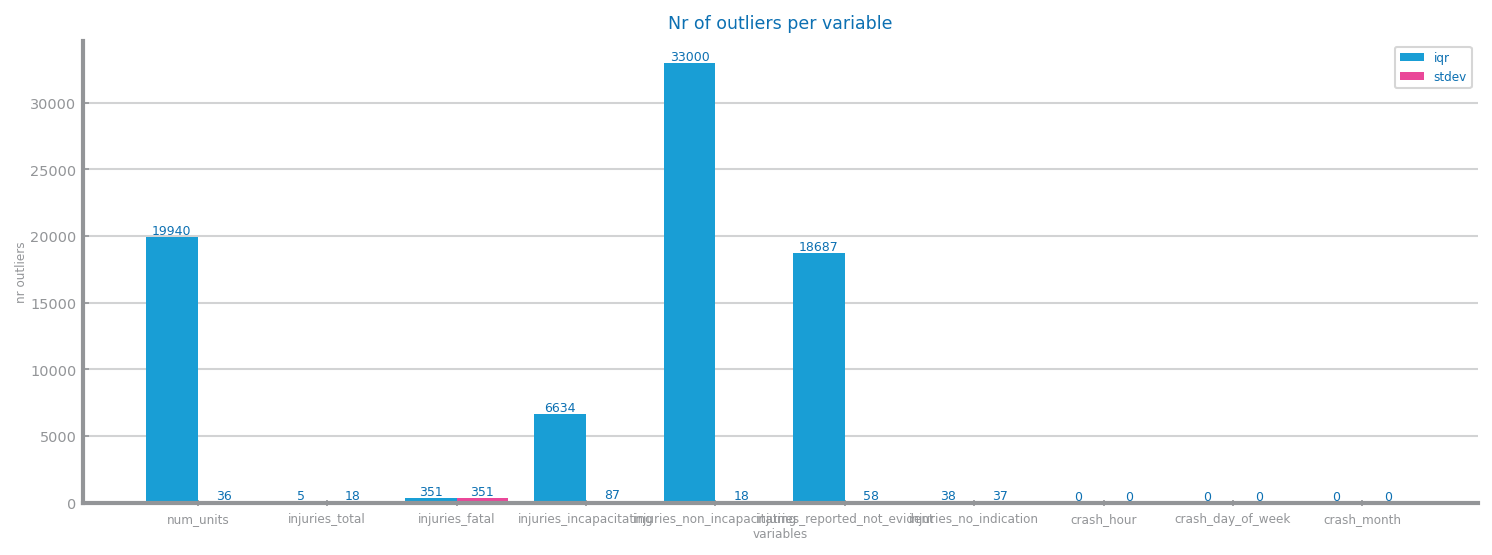

In [12]:
if [] != numeric:
    outliers: dict[str, int] = count_outliers(data, numeric, nrstdev=13, iqrfactor=14.5)
    figure(figsize=(12, HEIGHT))
    plot_multibar_chart(
        numeric,
        outliers,
        title="Nr of outliers per variable",
        xlabel="variables",
        ylabel="nr outliers",
        percentage=False,
    )
    savefig(f"../charts/lab2_profiling/{file_tag}_outliers_tuned.png")
    show()
else:
    print("There are no numeric variables.")

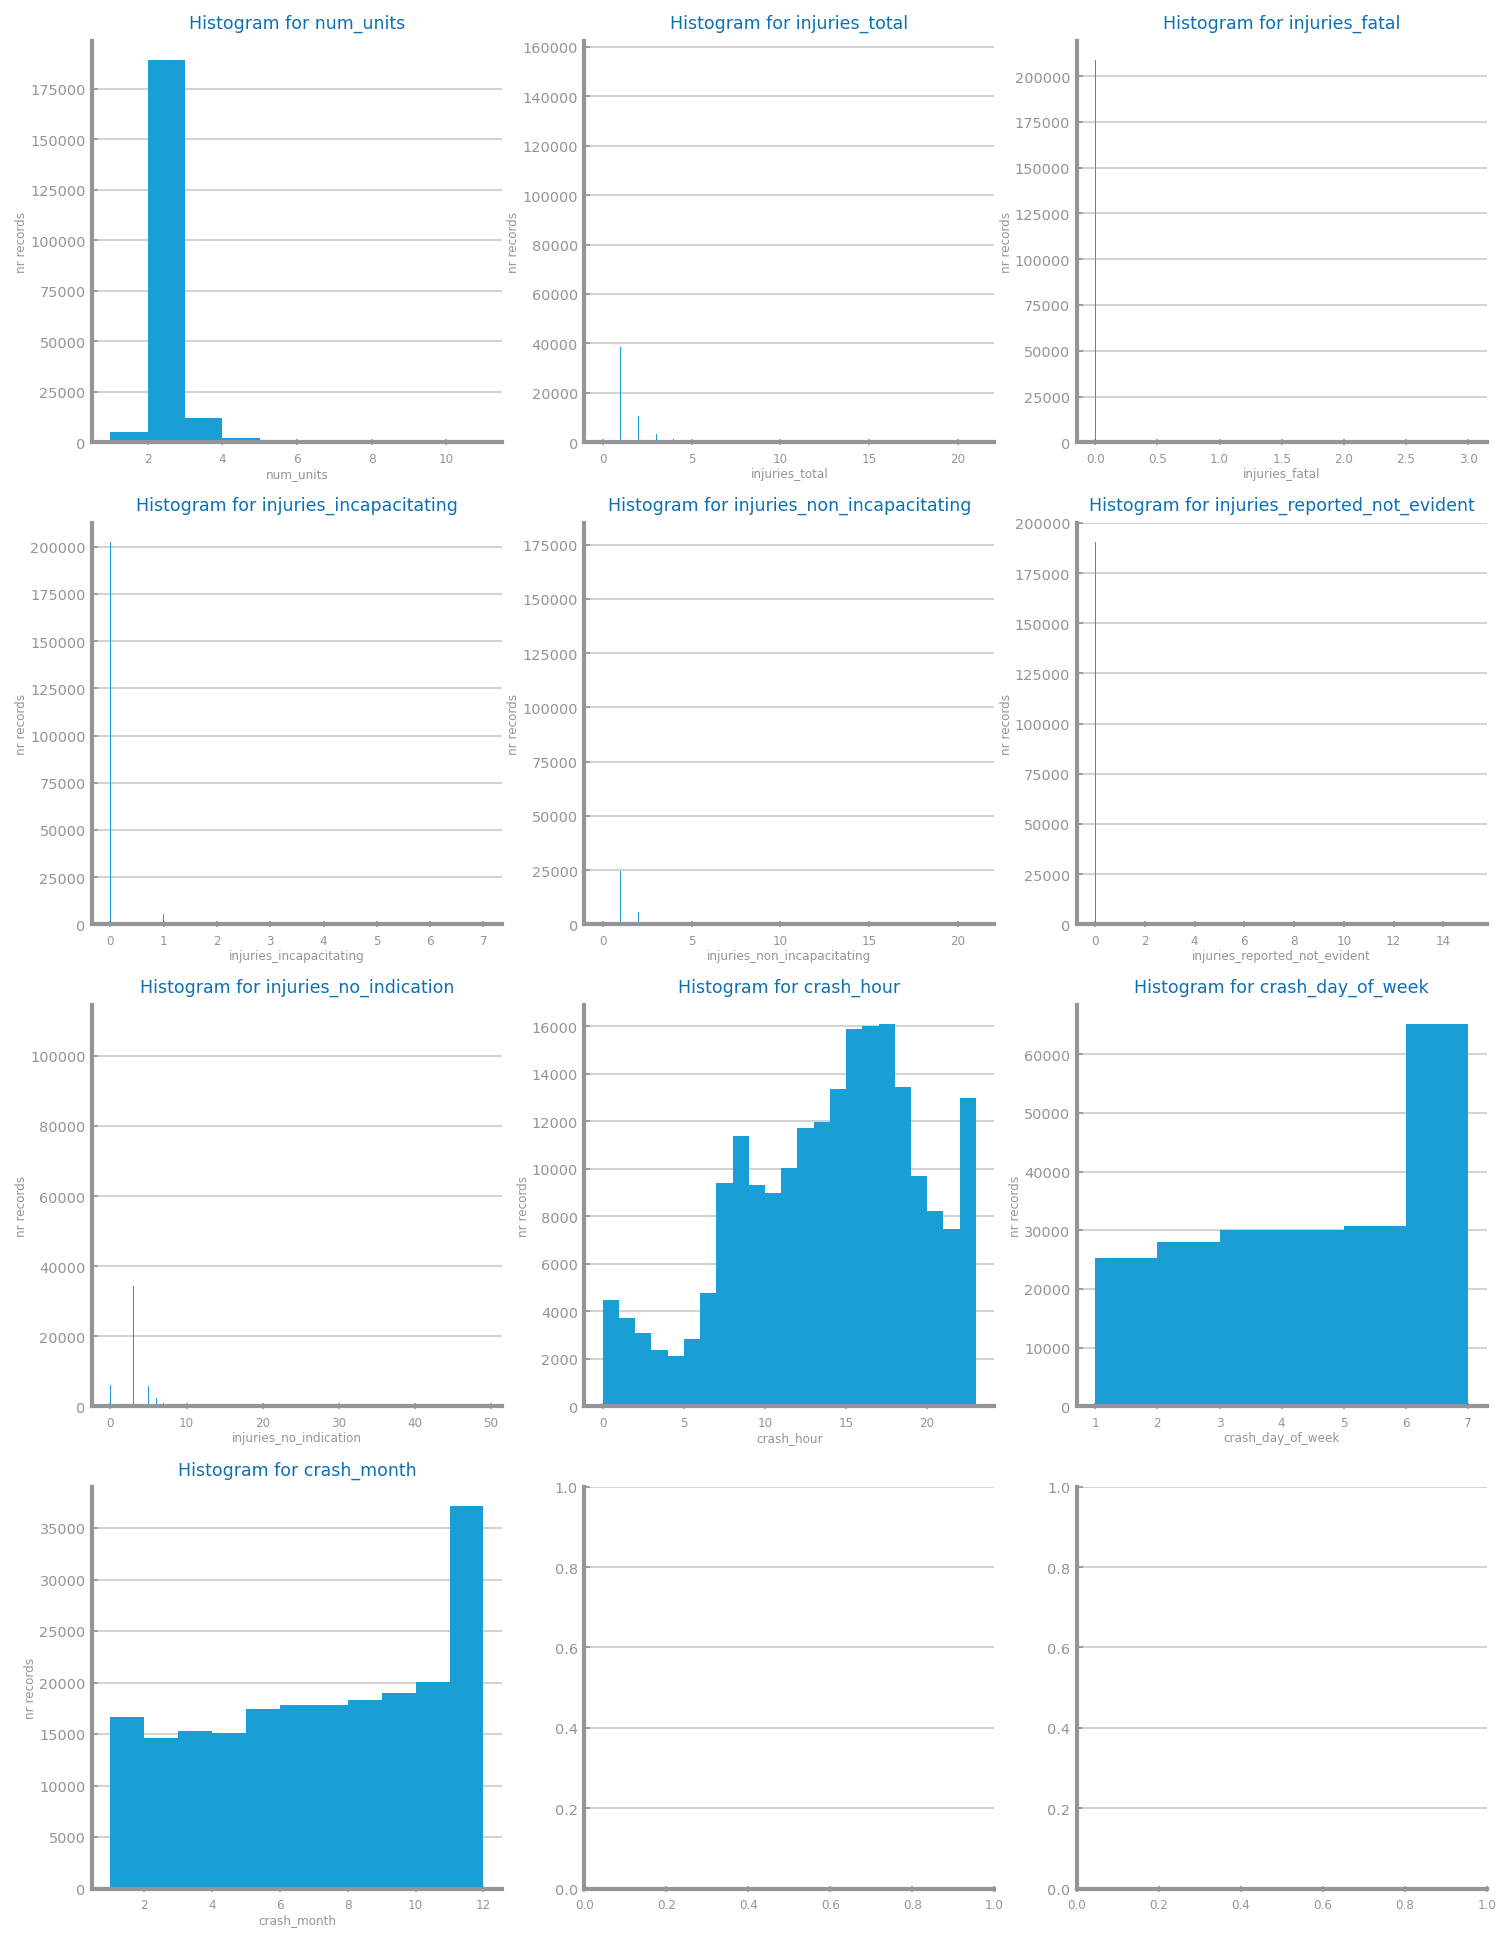

In [13]:
from dslabs_functions import set_chart_labels

if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(data[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"../charts/lab2_profiling/{file_tag}_single_histograms_numeric.png")
    show()
else:
    print("There are no numeric variables.")

<b>TODO:</b> Run this without the unbalanced distributions

num_units: n=209306, unique=11
num_units: fitting distributions
injuries_total: n=209306, unique=19
injuries_total: fitting distributions
injuries_fatal: n=209306, unique=4
injuries_fatal: histogram only
injuries_incapacitating: n=209306, unique=8
injuries_incapacitating: fitting distributions
injuries_non_incapacitating: n=209306, unique=19
injuries_non_incapacitating: fitting distributions
injuries_reported_not_evident: n=209306, unique=13
injuries_reported_not_evident: fitting distributions
injuries_no_indication: n=209306, unique=39
injuries_no_indication: fitting distributions
crash_hour: n=209306, unique=24
crash_hour: fitting distributions
crash_day_of_week: n=209306, unique=7
crash_day_of_week: fitting distributions
crash_month: n=209306, unique=12
crash_month: histogram only (forced)
before savefig
after savefig
before show


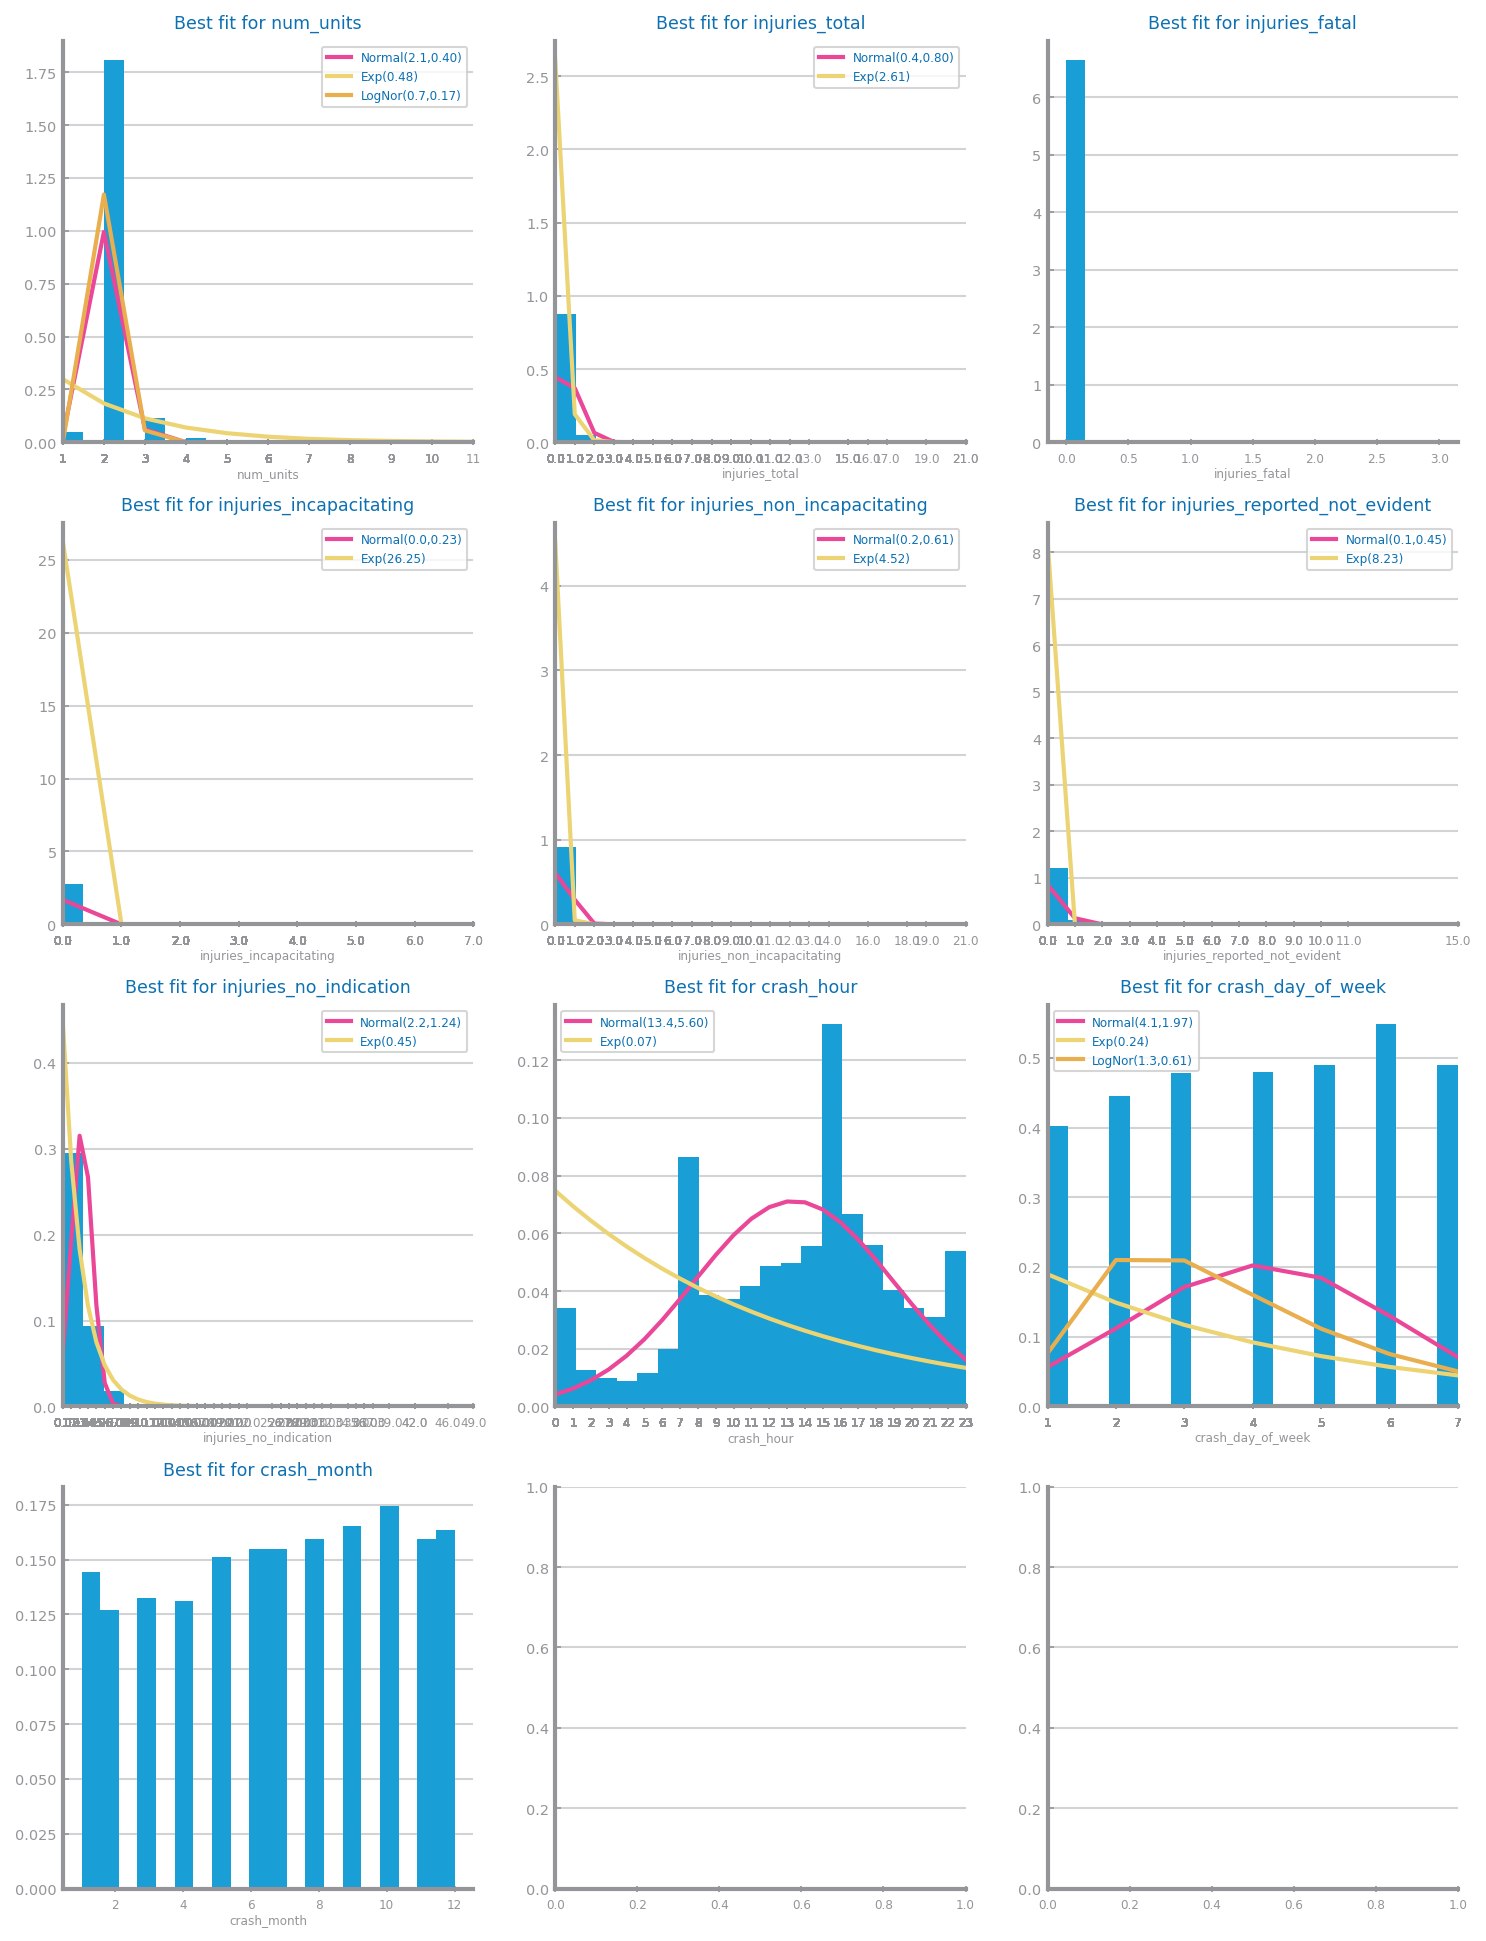

after show


In [14]:
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    mean, sigma = norm.fit(x_values)
    distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
    loc, scale = expon.fit(x_values, floc=0)
    distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
    if min(x_values) > 0:
        sigma, loc, scale = lognorm.fit(x_values, floc=0)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    unique_count = len(set(values))
    print(f"{var}: n={len(values)}, unique={unique_count}")

    if var == "crash_month":
        print(f"{var}: histogram only (forced)")
        ax.hist(values, 20, density=True)
        ax.set_title("Best fit for %s" % var)
        ax.set_xlabel(var)
        return

    if unique_count < 7:
        print(f"{var}: histogram only")
        ax.hist(values, 20, density=True)
        ax.set_title("Best fit for %s" % var)
        ax.set_xlabel(var)
        return

    print(f"{var}: fitting distributions")
    ax.hist(values, 20, density=True)
    distributions: dict = compute_known_distributions(values)
    plot_multiline_chart(
        values,
        distributions,
        ax=ax,
        title="Best fit for %s" % var,
        xlabel=var,
        ylabel="",
    )


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], data[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    print("before savefig")
    savefig(f"../charts/lab2_profiling/{file_tag}_histogram_numeric_distribution.png")
    print("after savefig")

    print("before show")
    show()
    print("after show")
else:
    print("There are no numeric variables.")

### Symbolic variables

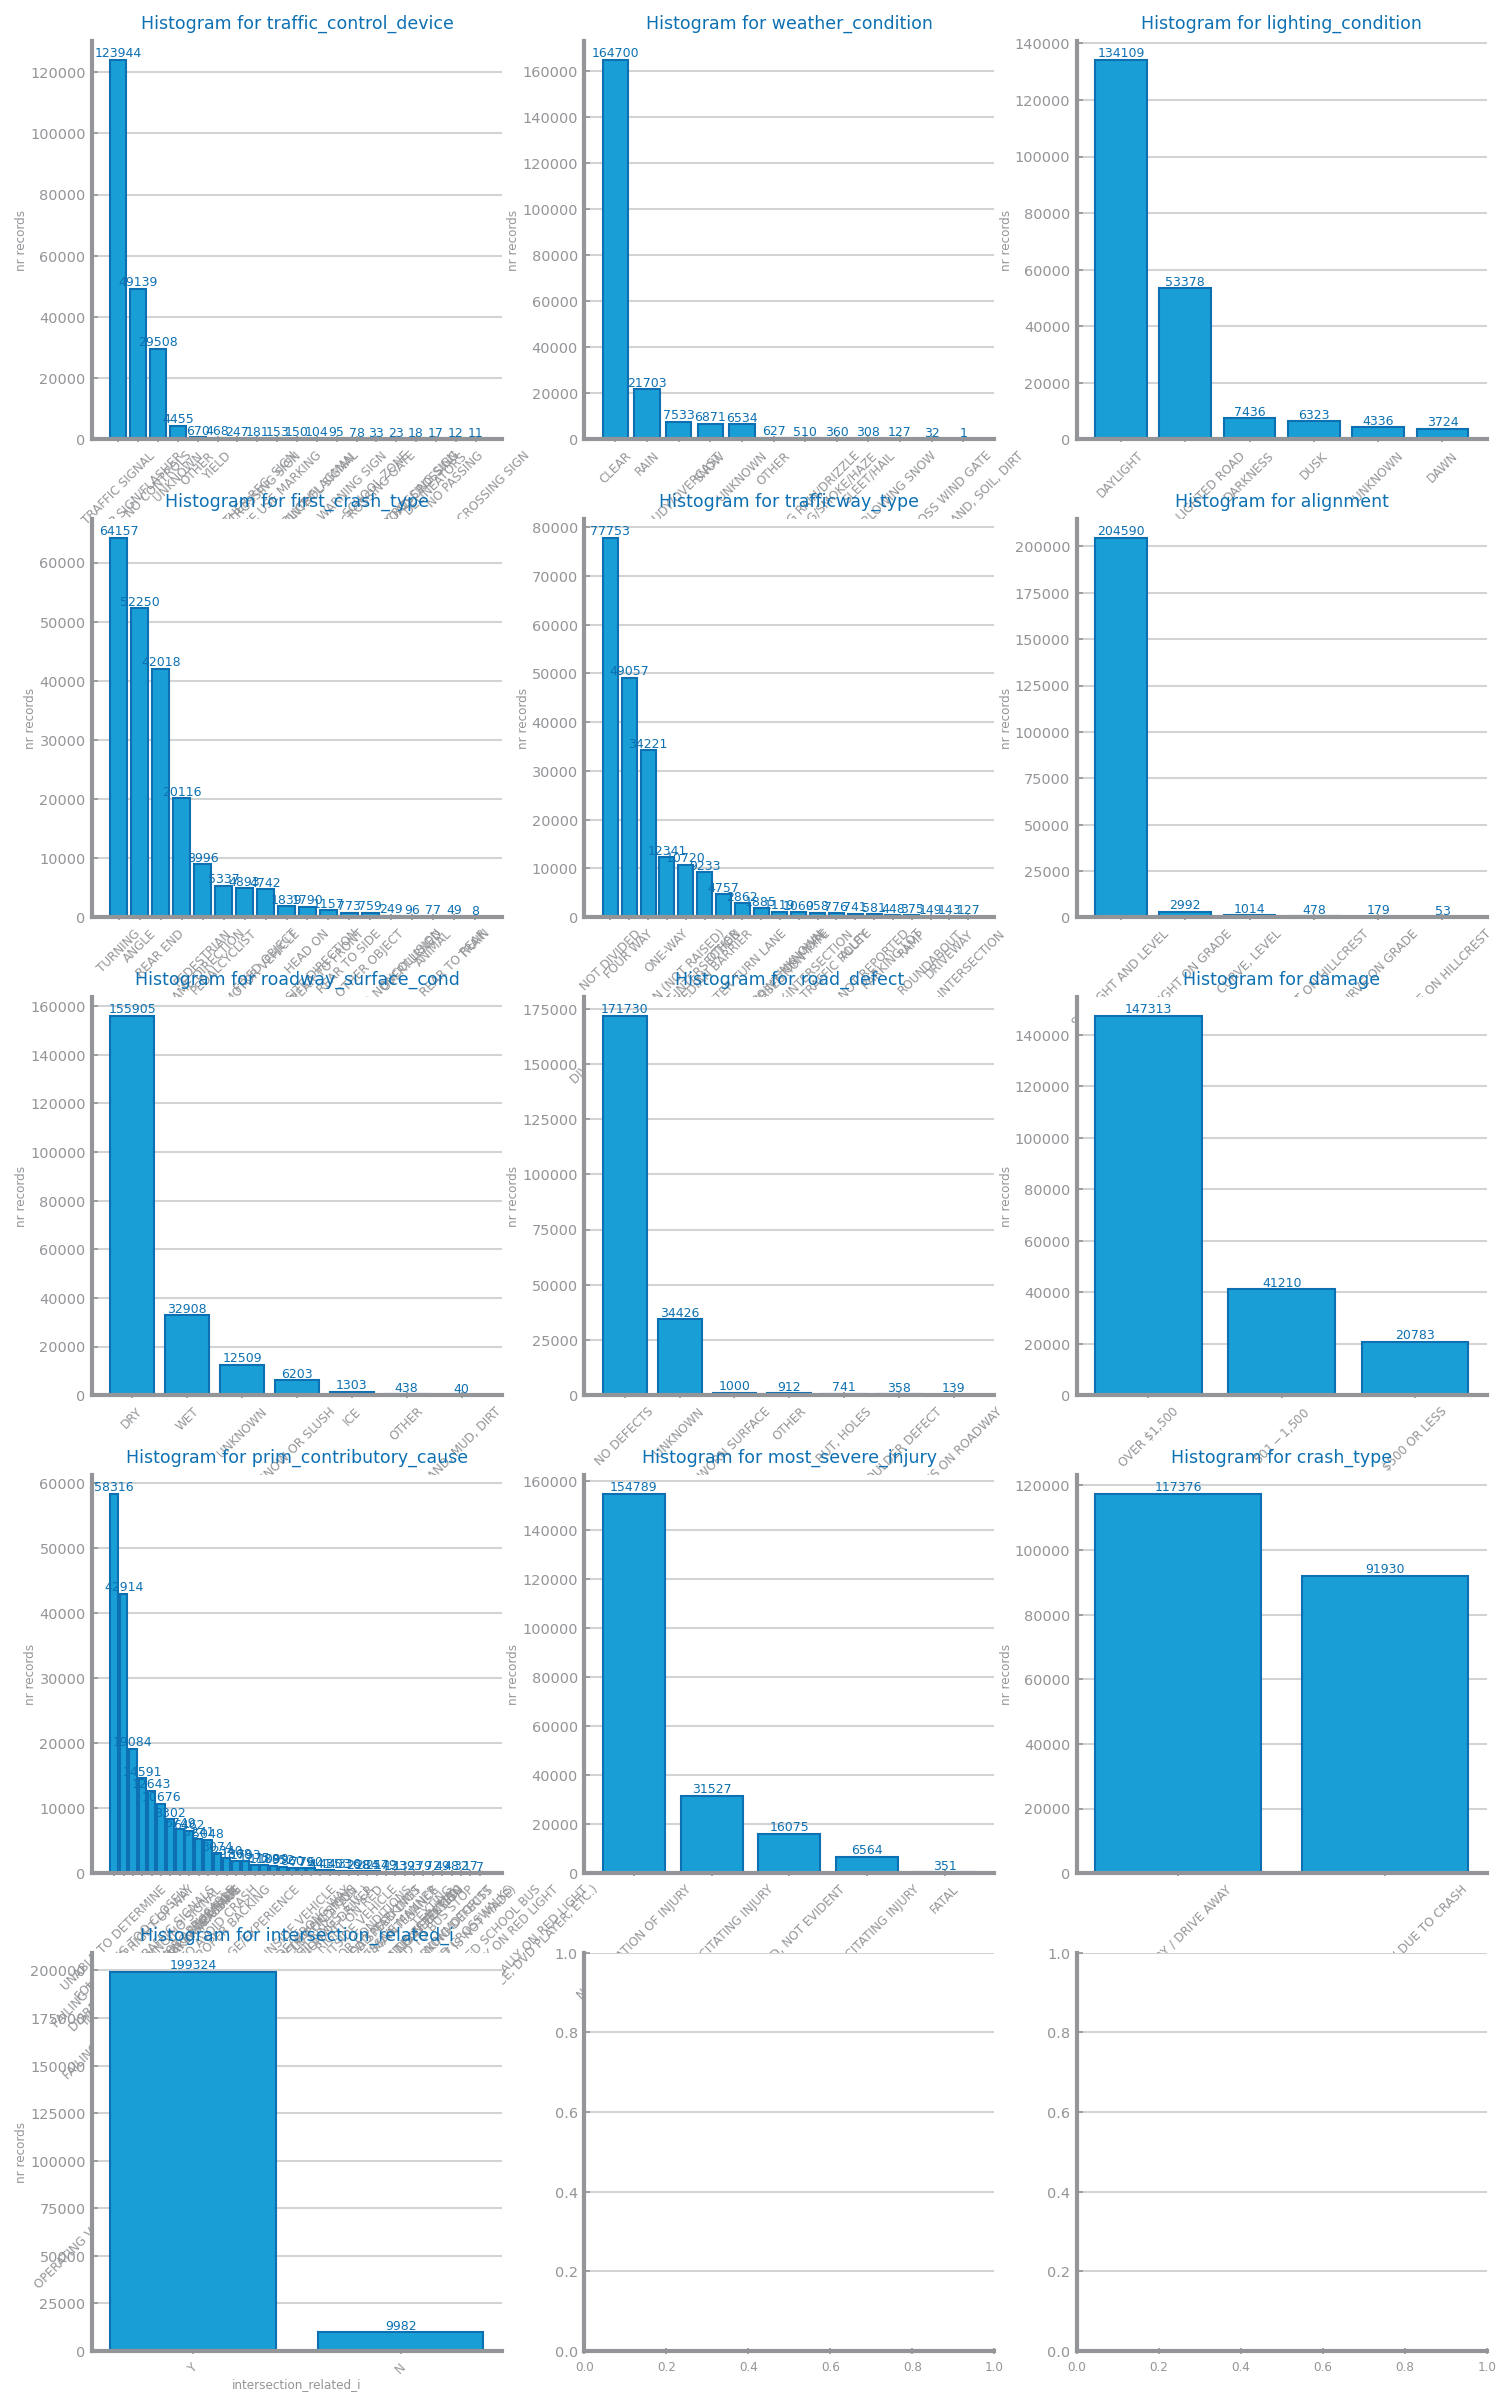

In [16]:
variables_types: dict[str, list] = get_variable_types(data)
symbolic: list[str] = variables_types["symbolic"] + variables_types["binary"]
if [] != symbolic:
    rows, cols = define_grid(len(symbolic))
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(symbolic)):
        counts: Series = data[symbolic[n]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[i, j],
            title="Histogram for %s" % symbolic[n],
            xlabel=symbolic[n],
            ylabel="nr records",
            percentage=False,
        )
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"../charts/lab2_profiling/{file_tag}_histograms_symbolic.png")
    show()
else:
    print("There are no symbolic variables.")

### Class distribution

crash_type
NO INJURY / DRIVE AWAY              117376
INJURY AND / OR TOW DUE TO CRASH     91930
Name: count, dtype: int64


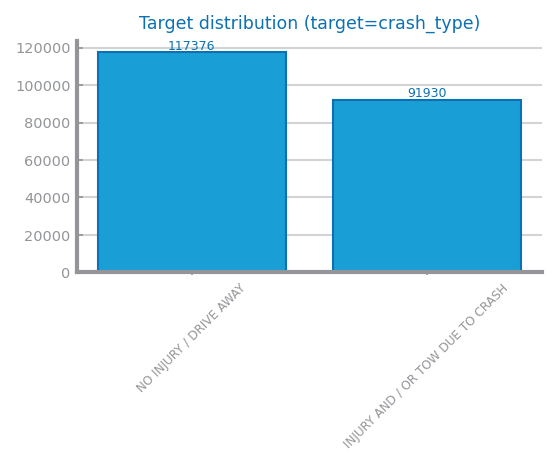

In [17]:
target = "crash_type"

values: Series = data[target].value_counts()
print(values)

figure(figsize=(4, 2))
plot_bar_chart(
    values.index.to_list(),
    values.to_list(),
    title=f"Target distribution (target={target})",
)
savefig(f"../charts/lab2_profiling/{file_tag}_class_distribution.png")
show()

# Granularity

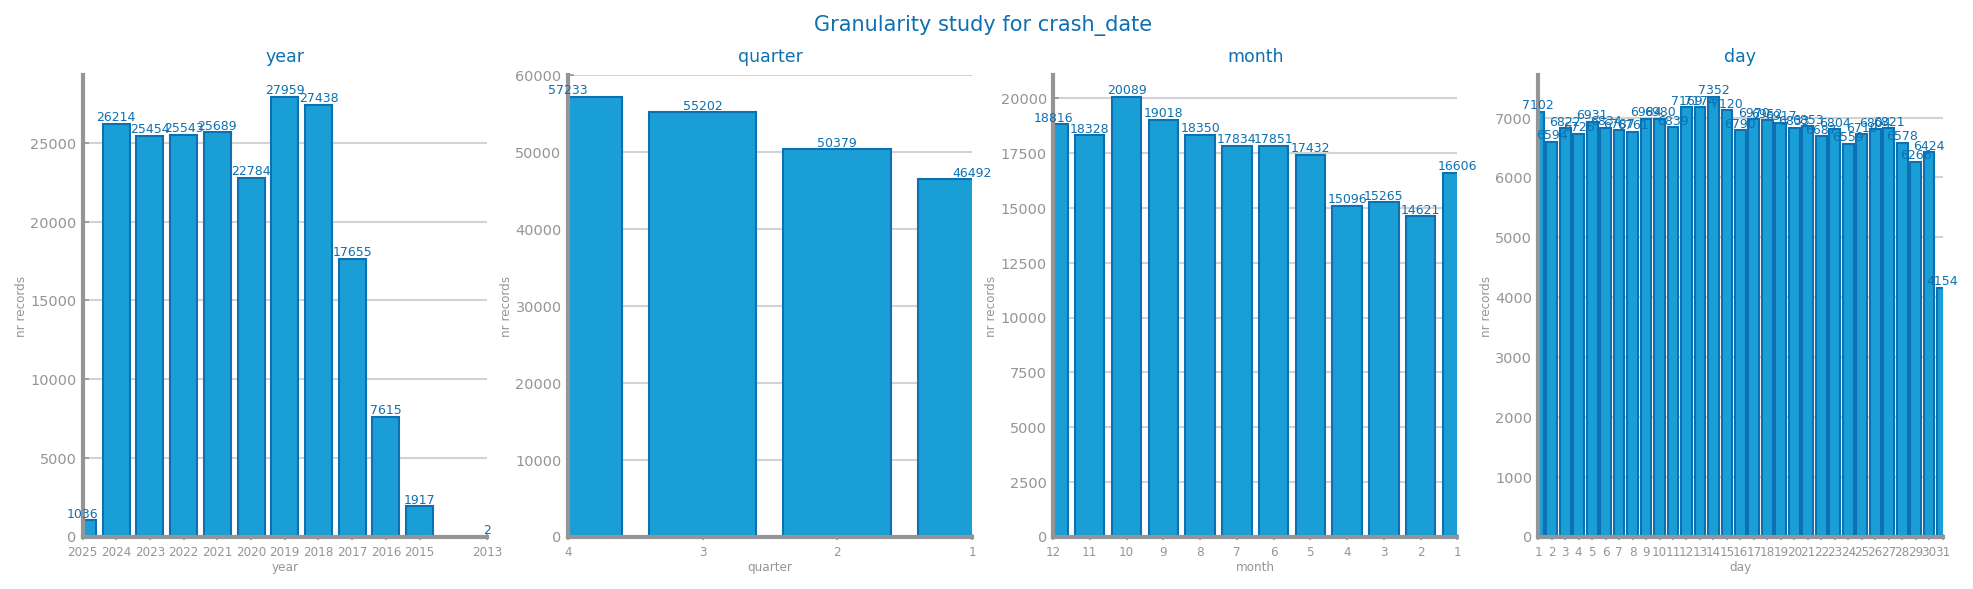

In [19]:
def analyse_date_granularity(data: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {var}")

    for i in range(cols):
        counts: Series[int] = data[var + "_" + levels[i]].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs


file_tag = "traffic_accidents"
data: DataFrame = read_csv(
    "../data/raw/traffic_accidents.csv", index_col=None, parse_dates=True, dayfirst=True
)
variables_types: dict[str, list] = get_variable_types(data)
data_ext: DataFrame = derive_date_variables(data, variables_types["date"])

for v_date in variables_types["date"]:
    analyse_date_granularity(data, v_date, ["year", "quarter", "month", "day"])
    savefig(f"../charts/lab2_profiling/{file_tag}_granularity_{v_date}.png")
    show()

# Sparsity

Takes forever...

In [2]:
file_tag = "traffic_accidents"
filename = "../data/raw/traffic_accidents.csv"
data: DataFrame = read_csv(filename, na_values="")
data = data.dropna()

# vars: list = data.columns.to_list()
# if [] != vars:
#     target = "crash_type"

#     n: int = len(vars) - 1
#     fig: Figure
#     axs: ndarray
#     fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
#     for i in range(len(vars)):
#         var1: str = vars[i]
#         for j in range(i + 1, len(vars)):
#             var2: str = vars[j]
#             plot_multi_scatters_chart(data, var1, var2, ax=axs[i, j - 1])
#     savefig(f"../charts/lab2_profiling/{file_tag}_sparsity_study.png")
#     show()
# else:
#     print("Sparsity class: there are no variables.")

In [ ]:
if [] != vars:
    target = "crash_type"

    n: int = len(vars) - 1
    fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
    for i in range(len(vars)):
        var1: str = vars[i]
        for j in range(i + 1, len(vars)):
            var2: str = vars[j]
            plot_multi_scatters_chart(data, var1, var2, target, ax=axs[i, j - 1])
    savefig(f"../charts/lab2_profiling/{file_tag}_sparsity_per_class_study.png")
    show()
else:
    print("Sparsity per class: there are no variables.")

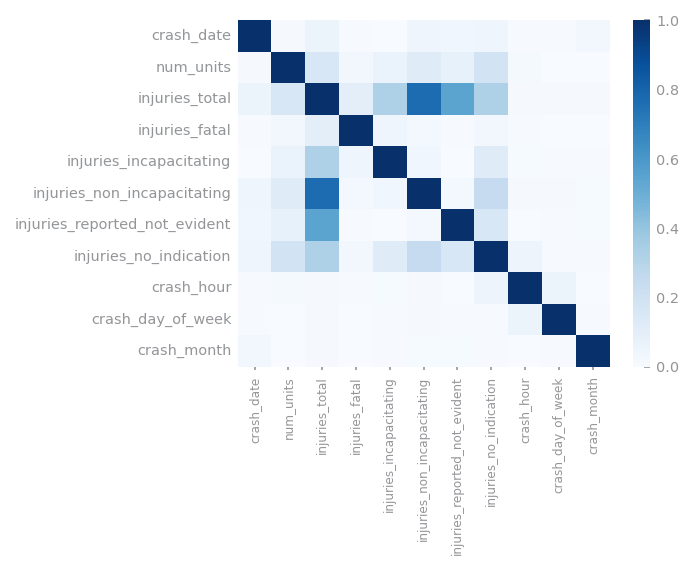

In [4]:
variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"../charts/lab2_profiling/{file_tag}_correlation_analysis.png")
show()